# BELLABEAT CASE STUDY

#### **ABOUT THE COMPANY(BELLABEAT)**
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

**KEY STAKEHOLDERS:**

**Primary Stakeholders:**

UrškaSršen: *Bellabeat’s cofounder and Chief Creative Officer SandoMur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team*

**Secondary Stakeholders:**

Bellabeat Marketing Analytics Team: *A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy*

**BUSINESS TASK:**

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

**KEY QUESTIONS:**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

In [2]:
# ENVIRONMENT SETUP

#Loading the required packages/libraries
library(tidyverse)
library(tidyr)
library(dplyr)
library(readr)
library(magrittr)
library(lubridate)
library(corrplot)
library(ggplot2)

# Input data files are available in the read-only "../input/" directory
dailyActivity=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate_seconds=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlyCalories=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minuteCaloriesNarrow=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minuteIntensitiesNarrow=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minuteMETsNarrow=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minuteSleep=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minuteStepsNarrow=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minuteStepsWide=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
sleepDay=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo=read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")








── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


corrplot 0.88 loaded



### PREPROCESSING STAGE

Steps Followed in PREPROCESSING STAGE

CLEANING
1. Checking Distinct IDs present in the dataset
2. Counting the number of NA values present in each individual dataset
3. Removing the Noisy Data
4. Checking and Removing Duplicates

TRANSFORMING
1. Analyzing the inconsistencies present in the datasets
2. Converting the Characters to Date Format using Lubridate.
3. Creating new attributes required for further Analysis: "TypeOfUser","TotalActiveMinutes","DayOfWeek","SleepQuality","TimeToSleep"





In [3]:
#PREPROCESSING


#Finding the distinct data based on Id from the orignial dataset
n_distinct(dailyActivity$Id)
n_distinct(dailyCalories$Id)
n_distinct(dailyIntensities$Id)
n_distinct(dailySteps$Id)
n_distinct(sleepDay$Id)
n_distinct(heartrate_seconds$Id)
n_distinct(weightLogInfo$Id)


[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 14

[1] 8

* Since heartrate_seconds & weightLogInfo does not have sufficient about of data, we can not conclude or derive any solid findings from these two datasets.
* There are in total 33 Ids in rest of the data, except 24 IDs in sleepDay datasets.

In [4]:
#CLEANING
#Checking whether bad data present in the datasets or not
#Counting the number of NA values
sum(is.na(dailyActivity))
sum(is.na(dailyCalories))
sum(is.na(dailyIntensities))
sum(is.na(dailySteps))
sum(is.na(sleepDay))
sum(is.na(heartrate_seconds))
sum(is.na(weightLogInfo))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

WeightLogInfo contains some NA values in different attributes. So we need to clean this up before proceeding further.

In [5]:
#Selecting the required Columns and removing the NA values.
weightLogInfo <- weightLogInfo %>% select(Id,Date,WeightKg,BMI) %>% drop_na()
sum(is.na(weightLogInfo))

[1] 0

In [6]:
#Checking Duplicates
sum(duplicated(dailyActivity))
sum(duplicated(dailyCalories))
sum(duplicated(dailyIntensities))
sum(duplicated(dailySteps))
sum(duplicated(heartrate_seconds))
sum(duplicated(hourlyCalories))
sum(duplicated(hourlyIntensities))
sum(duplicated(hourlySteps))
sum(duplicated(minuteCaloriesNarrow))
sum(duplicated(minuteCaloriesWide))
sum(duplicated(minuteIntensitiesNarrow))
sum(duplicated(minuteIntensitiesWide))
sum(duplicated(minuteMETsNarrow))
sum(duplicated(weightLogInfo))
sum(duplicated(minuteStepsNarrow))
sum(duplicated(minuteStepsWide))

#Duplicates Found In following two datasets

sum(duplicated(minuteSleep))
sum(duplicated(sleepDay))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 543

[1] 3

In [7]:
#Removing duplicates present in minuteSleep & sleepDay Data
print("Row Count Before(minuteSleep):")
nrow(minuteSleep)
minuteSleep<- minuteSleep[!duplicated(minuteSleep), ]
print("Duplicated Rows(minuteSleep):")
sum(duplicated(minuteSleep))
print("Row Count After(minuteSleep):")
nrow(minuteSleep)

print("Row Count Before(sleepDay):")
nrow(sleepDay)
sleepDay<- sleepDay[!duplicated(sleepDay), ]
print("Duplicated Rows(sleepDay):")
sum(duplicated(sleepDay))
print("Row Count After(sleepDay):")
nrow(sleepDay)

[1] "Row Count Before(minuteSleep):"


[1] 188521

[1] "Duplicated Rows(minuteSleep):"


[1] 0

[1] "Row Count After(minuteSleep):"


[1] 187978

[1] "Row Count Before(sleepDay):"


[1] 413

[1] "Duplicated Rows(sleepDay):"


[1] 0

[1] "Row Count After(sleepDay):"


[1] 410

In [8]:
#TRANSFORMATION STEPS

#Analyzing the datasets

head(dailyActivity)
head(sleepDay)
head(dailyCalories)
head(dailySteps)
head(dailyIntensities)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


In [10]:
#Working with dates

str(dailyActivity)
#we can see that the data type of ActivtyDate attribute is of Character class, in order to perform date wise analysis we need to convert it to date format using lubridate package
str(sleepDay)
#we can see that the data type of SleepDay attribute is of Character class, in order to perform date wise analysis we need to convert it to date format using lubridate package

dailyActivity$ActivityDate <- gsub("/","-",dailyActivity$ActivityDate) %>% 
  parse_date_time(orders = "mdy")

sleepDay$SleepDay <- gsub("/","-",sleepDay$SleepDay) %>% parse_date_time(orders="mdy hms") %>%
  as_date()


class(dailyActivity$ActivityDate)
class(sleepDay$SleepDay)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

Warning message:
“hms, hm and ms usage is deprecated, please use HMS, HM or MS instead. Deprecated in version '1.5.6'.”


[1] "POSIXct" "POSIXt"

[1] "Date"

In [11]:
#In DailyActivity dataframe,
#Creating a new Categorical Attributes as "TypeOfUsers":"Inactive,Average,VeryActive" to distinguish the users w.r.t to average steps taken
#Inactive: less than 5,000 steps per day
#Average: ranges from 5,000 to 8,000 steps per day
#Active: ranges from 8000 to 12500 steps
#Very active: more than 12,500 steps per day

dailyActivity = mutate(dailyActivity,TypeOfUser= case_when(
  TotalSteps >= 12500 ~ "VeryActive",
  TotalSteps >= 8000 & TotalSteps < 12500 ~ "Active",
  TotalSteps >= 5000 & TotalSteps < 8000 ~ "Average",
  TotalSteps < 5000 ~ "Inactive"
))

#Creating a new attribute as "TotalActiveMinutes" for every users
dailyActivity = mutate(dailyActivity,TotalActiveMinutes=VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes)

#Converting the "TypeOfUser" attribute as factor
dailyActivity$TypeOfUser=as.factor(dailyActivity$TypeOfUser)

#Creating a new Variable "DayOfWeek" which will store the weekdays
dailyActivity <- mutate(dailyActivity,DayOfWeek=wday(ActivityDate,label = TRUE))

head(dailyActivity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TypeOfUser,TotalActiveMinutes,DayOfWeek
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,VeryActive,366,Tue
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Active,257,Wed
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Active,222,Thu
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Active,272,Fri
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,VeryActive,267,Sat
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Active,222,Sun


In [37]:
#In sleepDay data,
#Mutating a new column as "TimeToSleep" which will calculate the time taken by an individual to sleep
sleepDay <- mutate(sleepDay,TimeToSleep=as.numeric(TotalTimeInBed)-as.numeric(TotalMinutesAsleep))

#Mutating a new Column as "SleepQualtiy" which will categorize the users based on sleep hours
sleepDay=mutate(sleepDay,SleepQuality = case_when(
  TotalMinutesAsleep/60 >= 6 & TotalMinutesAsleep/60 <= 8 ~ "Sufficient",
  TotalMinutesAsleep/60 < 6 ~ "Insufficient",
  TotalMinutesAsleep/60 > 8 ~ "Oversleeping"
))

#Converting the "SleepQuality" attribute as factor
sleepDay$SleepQuality=as.factor(sleepDay$SleepQuality)

#Mutating a new Column "DayOfWeek"(Same Logic as used in daily activity dateset)
sleepDay <- mutate(sleepDay,DayOfWeek=wday(SleepDay,label = TRUE))

head(sleepDay)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeToSleep,SleepQuality,DayOfWeek
,<dbl>,<date>,<int>,<int>,<int>,<dbl>,<fct>,<ord>
1,1503960366,2016-04-12,1,327,346,19,Insufficient,Tue
2,1503960366,2016-04-13,2,384,407,23,Sufficient,Wed
3,1503960366,2016-04-15,1,412,442,30,Sufficient,Fri
4,1503960366,2016-04-16,2,340,367,27,Insufficient,Sat
5,1503960366,2016-04-17,1,700,712,12,Oversleeping,Sun
6,1503960366,2016-04-19,1,304,320,16,Insufficient,Tue


### DESCRIPTIVE ANALYSIS 

In [13]:
#DESCRIPTIVE ANALYSIS

#Daily Activity Summary
dailyActivity %>% select(TotalSteps,TotalDistance,Calories,SedentaryMinutes,TypeOfUser,TotalActiveMinutes) %>% summary()

   TotalSteps    TotalDistance       Calories    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :2134   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   :2304   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :4900   Max.   :1440.0  
      TypeOfUser  TotalActiveMinutes
 Active    :289   Min.   :  0.0     
 Average   :204   1st Qu.:146.8     
 Inactive  :303   Median :247.0     
 VeryActive:144   Mean   :227.5     
                  3rd Qu.:317.2     
                  Max.   :552.0     

**ANALYSIS:**
* Here we can see that the Average of Total Steps Count is 7600(approx) which is little lower than the average daily steps count preferred by WHO i.e 8000 steps
* Bellabeat can notify its user through their mobile application regarding the remaining daily steps count to complete.
* The maximum number of users fall into Inactive Category and Bellabeat can focus on these users.

In [14]:
#Active Minutes Summary
dailyIntensities %>% select(SedentaryMinutes,LightlyActiveMinutes,ModeratelyActiveDistance,FairlyActiveMinutes,VeryActiveMinutes,VeryActiveDistance) %>% 
  summary()


 SedentaryMinutes LightlyActiveMinutes ModeratelyActiveDistance
 Min.   :   0.0   Min.   :  0.0        Min.   :0.0000          
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:0.0000          
 Median :1057.5   Median :199.0        Median :0.2400          
 Mean   : 991.2   Mean   :192.8        Mean   :0.5675          
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.:0.8000          
 Max.   :1440.0   Max.   :518.0        Max.   :6.4800          
 FairlyActiveMinutes VeryActiveMinutes VeryActiveDistance
 Min.   :  0.00      Min.   :  0.00    Min.   : 0.000    
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.: 0.000    
 Median :  6.00      Median :  4.00    Median : 0.210    
 Mean   : 13.56      Mean   : 21.16    Mean   : 1.503    
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.: 2.053    
 Max.   :143.00      Max.   :210.00    Max.   :21.920    

**ANALYSIS:**
* We can clearly distinguish the difference between average Lightly Active Minutes and Fairly/Moderate/Very Active Minutes
* The average Sedentary Minutes is also quite high i.e 16hrs(approx).This helps to identify that most of the users were Lightly Active or Inactive.

In [15]:
#Sleep
sleepDay %>% select(TotalMinutesAsleep,TotalTimeInBed,TimeToSleep,SleepQuality) %>% summary()


 TotalMinutesAsleep TotalTimeInBed   TimeToSleep           SleepQuality
 Min.   : 58.0      Min.   : 61.0   Min.   :  0.00   Insufficient:100  
 1st Qu.:361.0      1st Qu.:403.8   1st Qu.: 17.00   Oversleeping:114  
 Median :432.5      Median :463.0   Median : 25.50   Sufficient  :196  
 Mean   :419.2      Mean   :458.5   Mean   : 39.31                     
 3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.: 40.00                     
 Max.   :796.0      Max.   :961.0   Max.   :371.00                     

**ANALYSIS:**
* There is a unique finding from the above analysis, the "TimeToSleep" (attribute which calculate the time difference between Total time in bed and total time asleep) helps to identify that average time interval is 39.31 minutes. Belabeat can use this data to
Monitor the sleep Pattern and can provide suggestion to its Users on "How to improve the sleep Quality?" etc.

In [16]:
#Weight
weightLogInfo %>% select(WeightKg,BMI) %>% summary()

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

**ANALYSIS:**
* The normal BMI falls in the range of 18.5 – 24.9. And we can see that the Mean BMI of the users is 25.29 which falls in the category of Overweight.

***Note- As there is no sufficient amount of data present in weightLogInfo dataset, its hard to derive any conclusion from the above analysis. ***

### EXPLORATORY DATA ANALYSIS USING GGPLOT PACKAGE

[1] "Correlation between Calories and TotalSteps:"


[1] 0.5915681

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



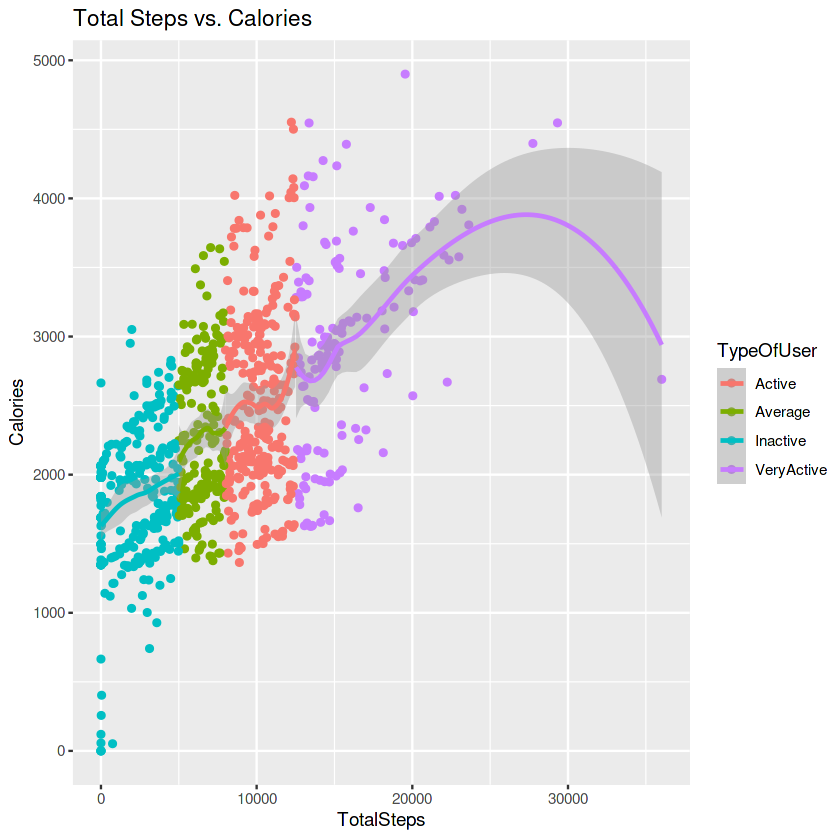

In [17]:
#VISUALIZING THE DATA USING GGPLOT2 PACKAGE
#TO FIND TRENDS IN OUR DATA USING VARIOUS PLOTS


#Checking the Correlation between the two variables
print("Correlation between Calories and TotalSteps:")
cor(dailyActivity$Calories,dailyActivity$TotalSteps)

# We are finding Positive Correlation between these two Variables.

#Visualizing the relationship between steps and Calories
ggplot(dailyActivity,aes(x=TotalSteps,y=Calories,color=TypeOfUser))+geom_point()+geom_smooth()+labs(title="Total Steps vs. Calories")

**ANALYSIS:**
* We can see that there exist a positive correlation between the totalsteps~Calories.
* Its obvious thing that higher the number of TotalSteps, higher will be the calories burned. And this hypothesis is proved by above graph.


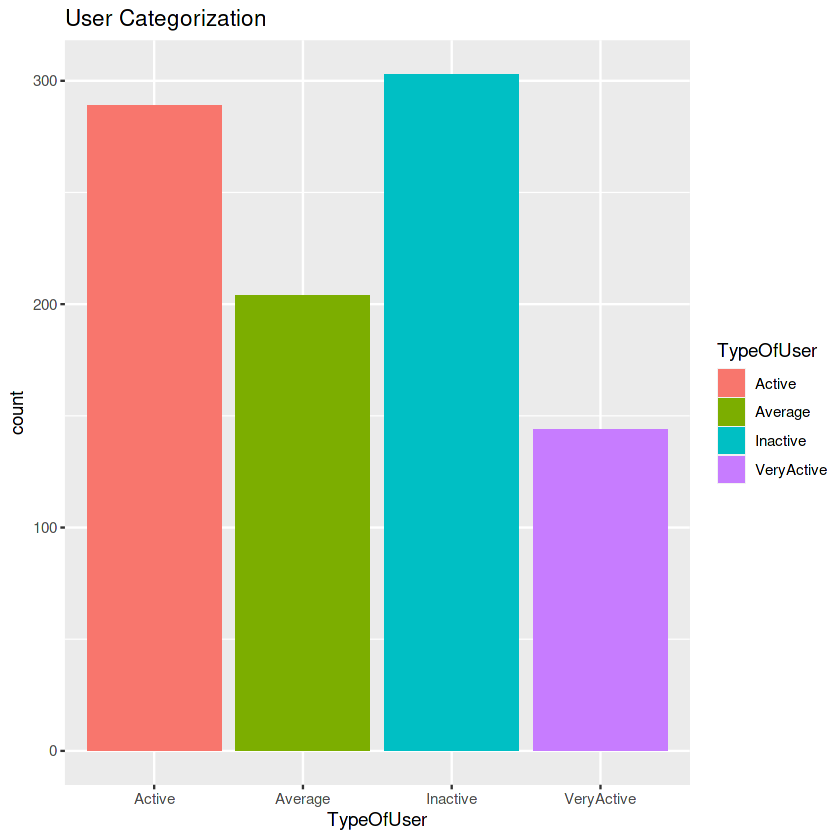

In [18]:
##2. Visualize the types of Users present in dailyActivity Data and Analyzing them

ggplot(dailyActivity,aes(x=TypeOfUser,fill=TypeOfUser))+geom_bar()+labs(title="User Categorization")

**ANALYSIS:**

* From the above graph we can see that most of the users fall in the category of "Inactive" Users. This trend will help Bellabeat Team to identify the users to mainly focus on, so that they can share some insights with them regarding *importance of being physically fit* and *how their product can help them to achieve it.* 

* Bellabeat can also provide some offers to those users who are "VeryActive/Active",as these users might be using any other health trackers on daily basis.

In [19]:
#Analysing the mean of Total Steps,Calories & Distance Covered by each Category of Users(Active,Inactive,Average & VeryActive)

depth_analysis=dailyActivity %>% select(TotalSteps,Calories,TotalDistance,TypeOfUser) %>% group_by(TypeOfUser) %>% 
  summarize(meanTotalSteps=mean(TotalSteps),meanCaloriesBurned=mean(Calories),meanDistanceCovered=mean(TotalDistance))

View(depth_analysis)


TypeOfUser,meanTotalSteps,meanCaloriesBurned,meanDistanceCovered
<fct>,<dbl>,<dbl>,<dbl>
Active,10128.574,2523.408,7.206471
Average,6507.162,2267.029,4.578480
Inactive,2128.168,1806.812,1.463465
VeryActive,15834.597,2959.653,11.807014


* Its obvious that "VeryActive" users tends to spent more time in their workouts. And we can see this trend in the above depth analysis table also.
* The mean of Total steps, Calories Burned & Distance Covered is maximum in "VeryActive" Category.

**Below are some visualization to provide some extra context to above findings:**


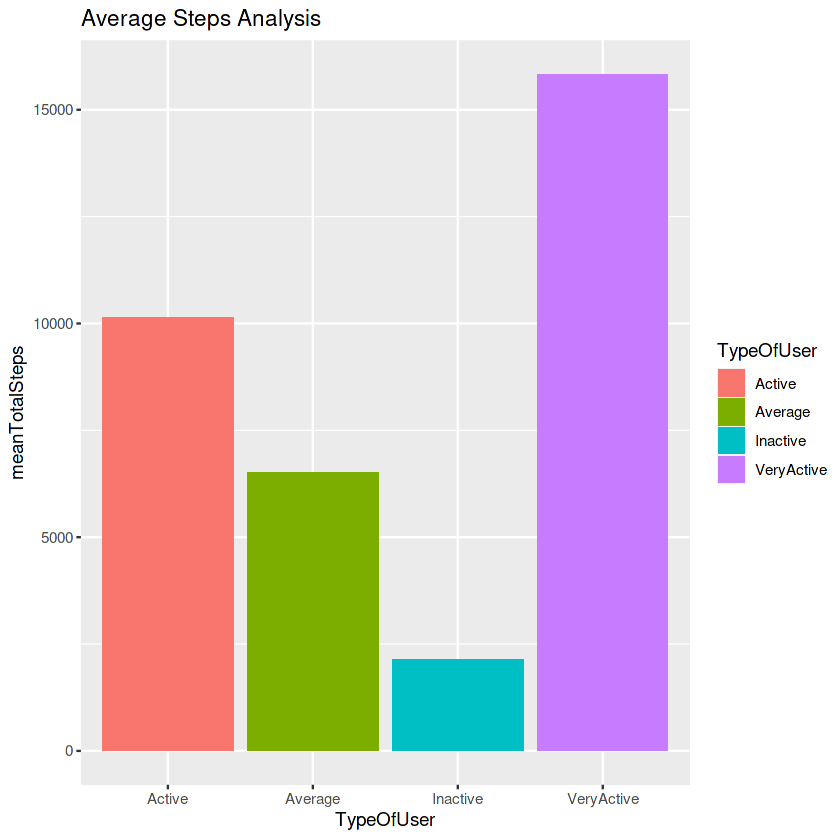

In [20]:
#Steps Analysis
ggplot(depth_analysis,aes(x=TypeOfUser,y=meanTotalSteps,fill=TypeOfUser))+geom_col()+labs(title="Average Steps Analysis")

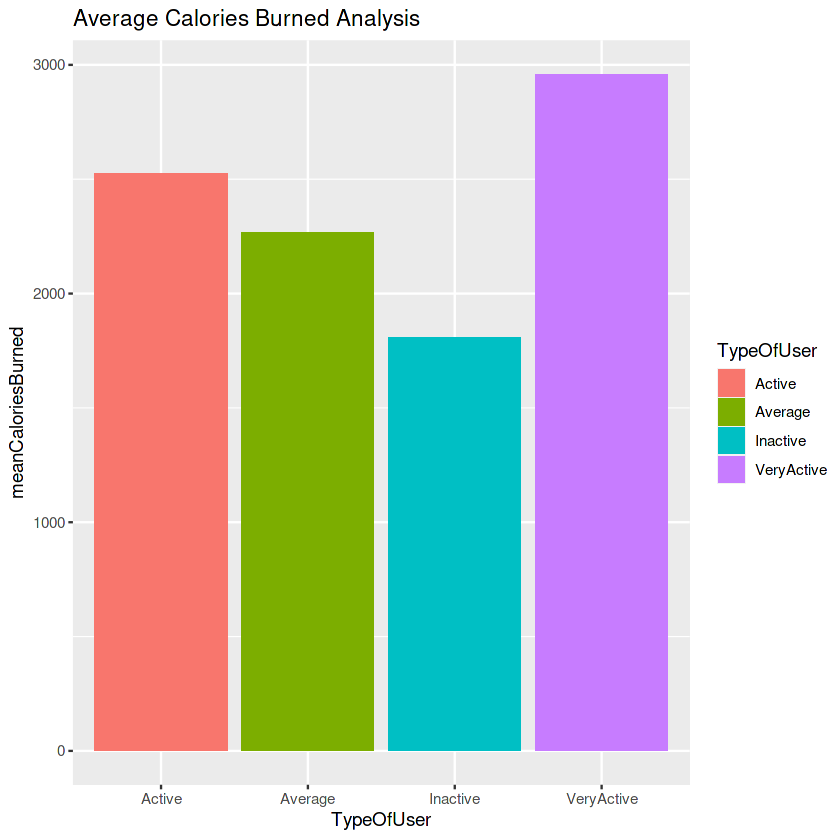

In [21]:
#Calories Burned Analysis
ggplot(depth_analysis,aes(x=TypeOfUser,y=meanCaloriesBurned,fill=TypeOfUser))+geom_col()+labs(title="Average Calories Burned Analysis")

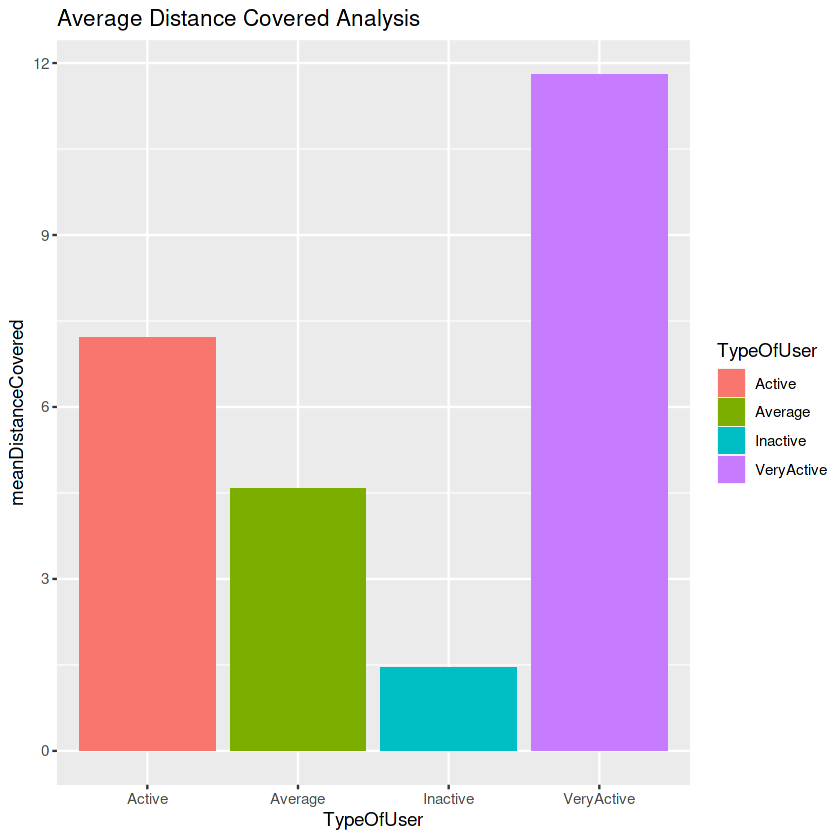

In [22]:
#Distance Covered Analysis
ggplot(depth_analysis,aes(x=TypeOfUser,y=meanDistanceCovered,fill=TypeOfUser))+geom_col()+labs(title="Average Distance Covered Analysis")

`summarise()` has grouped output by 'DayOfWeek'. You can override using the `.groups` argument.



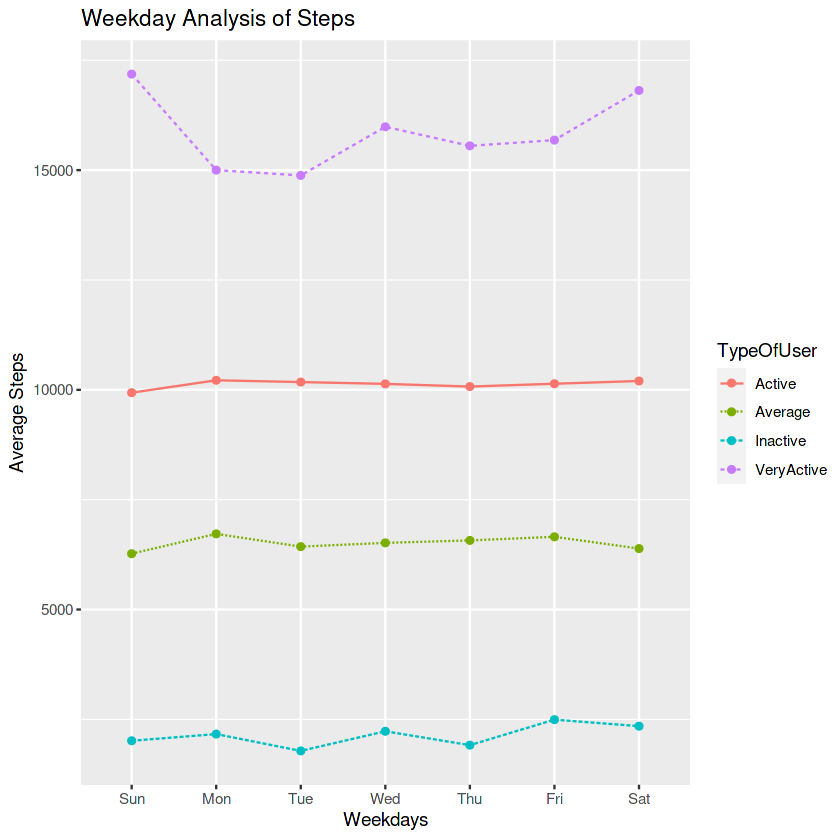

In [23]:
#Week days Analysis
dailyActivity %>% select(TotalSteps,DayOfWeek,TypeOfUser) %>% group_by(DayOfWeek,TypeOfUser) %>% summarise(mean_of_total_steps=mean(TotalSteps)) %>% 
  ggplot(aes(DayOfWeek,mean_of_total_steps,linetype=TypeOfUser,group=TypeOfUser,color=TypeOfUser))+xlab("Weekdays")+ylab("Average Steps")+labs(title="Weekday Analysis of Steps")+geom_point()+geom_line()

**ANALYSIS:**

* The above graph provides a weekday Steps analysis of different type of users.
* The **VeryActive** Users were more active on Saturday & Sundays.
* The **Active** Users were consistent with their step counts through out the week.



**In order to findout a little more complex trends, I am merging the daily Activity dataset with Sleep Day dataset. The merged dataset can be used for further deep down analysis.**

In [41]:
##3. Sleep Pattern
#Creating two different dataframes with required Columns
df1=dailyActivity %>% select(Id,ActivityDate,TotalSteps,TotalDistance,Calories,TypeOfUser,TotalActiveMinutes,DayOfWeek)
df2=sleepDay %>% select(Id,SleepDay,TotalMinutesAsleep,TotalTimeInBed,TimeToSleep,SleepQuality)

#Merging both the dataframes (InnerJoin: Since sleepDay only contains 24 distinct ids)
#Approach-1
#Renaming the column names so that they can be joined together
colnames(df2)[2] <- "Date"
colnames(df1)[2] <- "Date"

merged_df=merge(x=df1,y=df2,by=c("Id","Date"))
head(merged_df)
#Approach-2
#Without changing the column names
#merged_df_1=merge(x=df1,y=df2,by.x = c("Id","ActivityDate"),by.y=c("Id","SleepDay"))

,Id,Date,TotalSteps,TotalDistance,Calories,TypeOfUser,TotalActiveMinutes,DayOfWeek,TotalMinutesAsleep,TotalTimeInBed,TimeToSleep,SleepQuality
,<dbl>,<dttm>,<int>,<dbl>,<int>,<fct>,<int>,<ord>,<int>,<int>,<dbl>,<fct>
1,1503960366,2016-04-12,13162,8.50,1985,VeryActive,366,Tue,327,346,19,Insufficient
2,1503960366,2016-04-13,10735,6.97,1797,Active,257,Wed,384,407,23,Sufficient
3,1503960366,2016-04-15,9762,6.28,1745,Active,272,Fri,412,442,30,Sufficient
4,1503960366,2016-04-16,12669,8.16,1863,VeryActive,267,Sat,340,367,27,Insufficient
5,1503960366,2016-04-17,9705,6.48,1728,Active,222,Sun,700,712,12,Oversleeping
6,1503960366,2016-04-19,15506,9.88,2035,VeryActive,345,Tue,304,320,16,Insufficient


In [32]:
#Analysing the Sleep Pattern among different type of Users
merged_df %>% select(TotalMinutesAsleep,TypeOfUser) %>% group_by(TypeOfUser) %>% 
  summarise(average_sleep_time=mean(TotalMinutesAsleep))

TypeOfUser,average_sleep_time
<fct>,<dbl>
Active,416.6951
Average,412.8721
Inactive,454.2917
VeryActive,381.3125


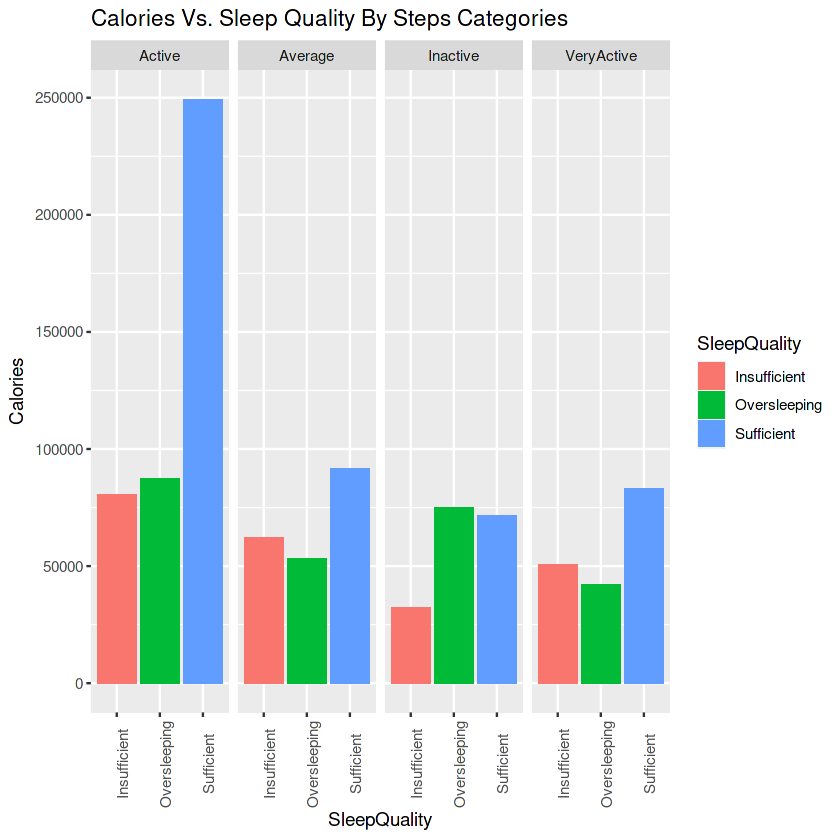

In [33]:
#Visualising the trends between the Calories ~ SleepQuality + Steps
ggplot(merged_df,aes(SleepQuality,Calories,fill=SleepQuality))+geom_col()+facet_grid(~TypeOfUser)+ theme(axis.text.x = element_text(angle = 90)) + labs(title = "Calories Vs. Sleep Quality By Steps Categories") 
 

**ANALYSIS:**
* In terms of total Calories Burned, most of the users fall into "Active" Class.There were less no. of "VeryActiveUsers" as compare to "Active" Users
* Inactive Users tends to spend more of their time sleeping which is unhealthy.
* We can clearly identify the underlying trends in each category of users.

merged_df$DayOfWeek,merged_df$TotalMinutesAsleep
<ord>,<dbl>
Sun,452.7455
Mon,419.5000
Tue,404.5385
Wed,434.6818
Thu,401.2969
Fri,405.4211
Sat,419.0702


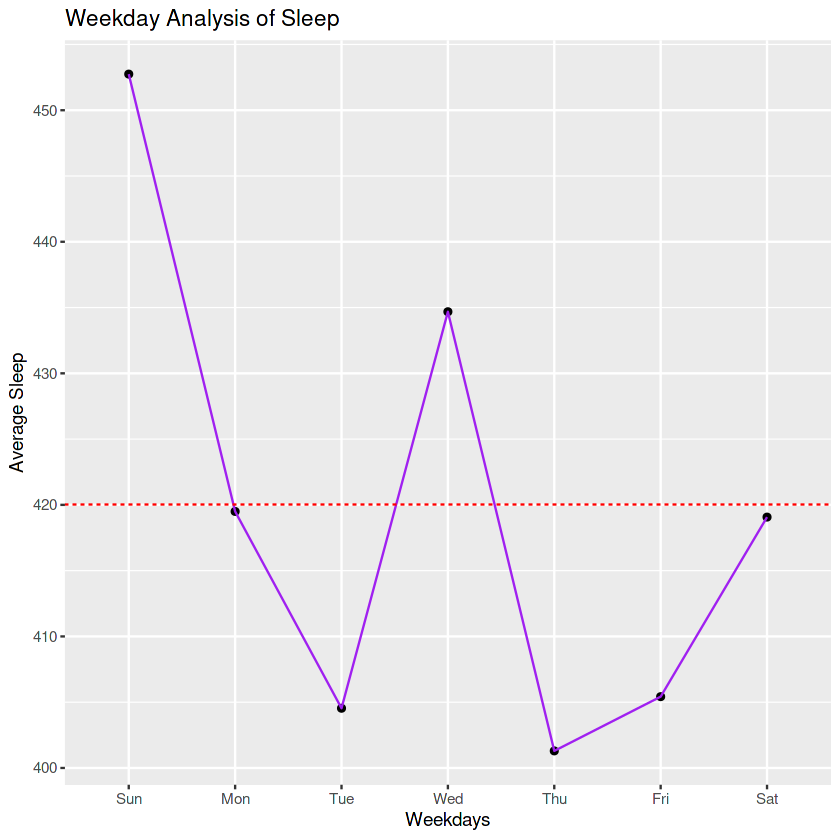

In [44]:
#Week day analysis of Total Minutes Asleep
aggregate(merged_df$TotalMinutesAsleep~merged_df$DayOfWeek,FUN=mean)
#aggregate(merged_df$TotalMinutesAsleep~merged_df$DayOfWeek+merged_df$TypeOfUser,FUN=mean)

#Week days Analysis
merged_df %>% select(TotalMinutesAsleep,DayOfWeek) %>% group_by(DayOfWeek) %>% summarise(mean_Asleep=mean(TotalMinutesAsleep)) %>% 
  ggplot(aes(DayOfWeek,mean_Asleep,group=1))+xlab("Weekdays")+ylab("Average Sleep")+labs(title="Weekday Analysis of Sleep")+geom_point()+geom_line(color="Purple")+
  geom_hline(yintercept=420, linetype="dashed", color = "red")

**ANALYSIS:**

* It seems an interesting trend that maximum users tends to take rest on **Sundays** followed by Wednesdays.

 *Note-Here the dotted red line represent the recommended sleep duration (i.e 7 hrs)*

* Tuesdays,Thursdays & Fridays are quite busy days (Sleep Duration is less on these days)



`summarise()` has grouped output by 'DayOfWeek'. You can override using the `.groups` argument.



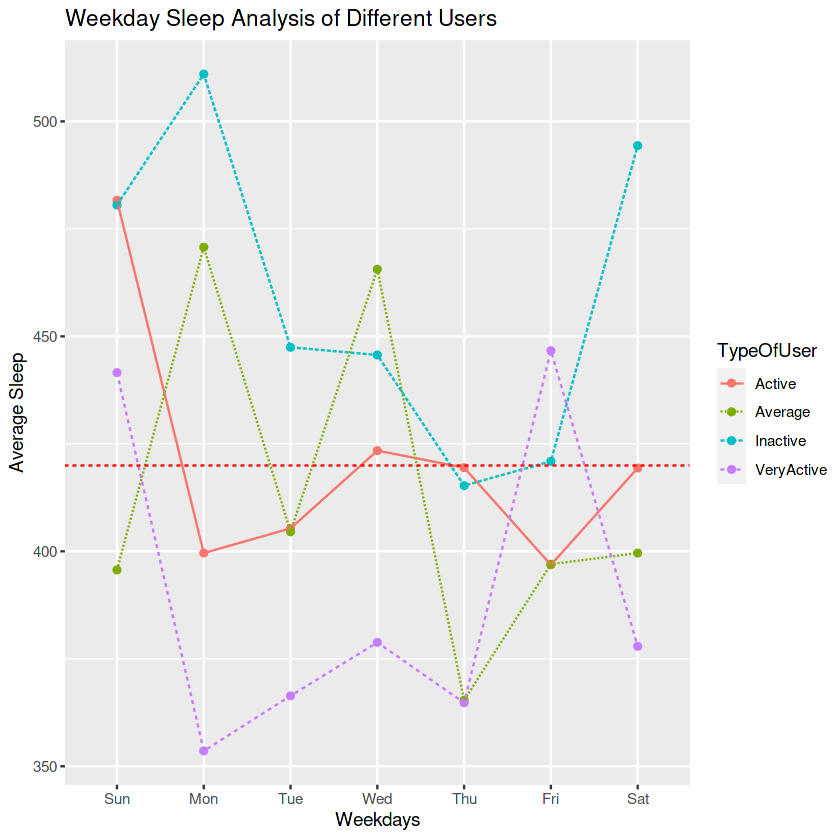

In [45]:
#Deriving the Sleep Pattern of individual type of Users:VeryActive,Active,Average,Inactive
merged_df %>% select(TotalMinutesAsleep,DayOfWeek,TypeOfUser) %>% group_by(DayOfWeek,TypeOfUser) %>% summarise(mean_Asleep=mean(TotalMinutesAsleep)) %>% 
  ggplot(aes(DayOfWeek,mean_Asleep,group=TypeOfUser,linetype=TypeOfUser,color=TypeOfUser))+xlab("Weekdays")+ylab("Average Sleep")+labs(title="Weekday Sleep Analysis of Different Users")+geom_point()+geom_line(size=0.5)+
  geom_hline(yintercept=420, linetype="dashed", color = "red")

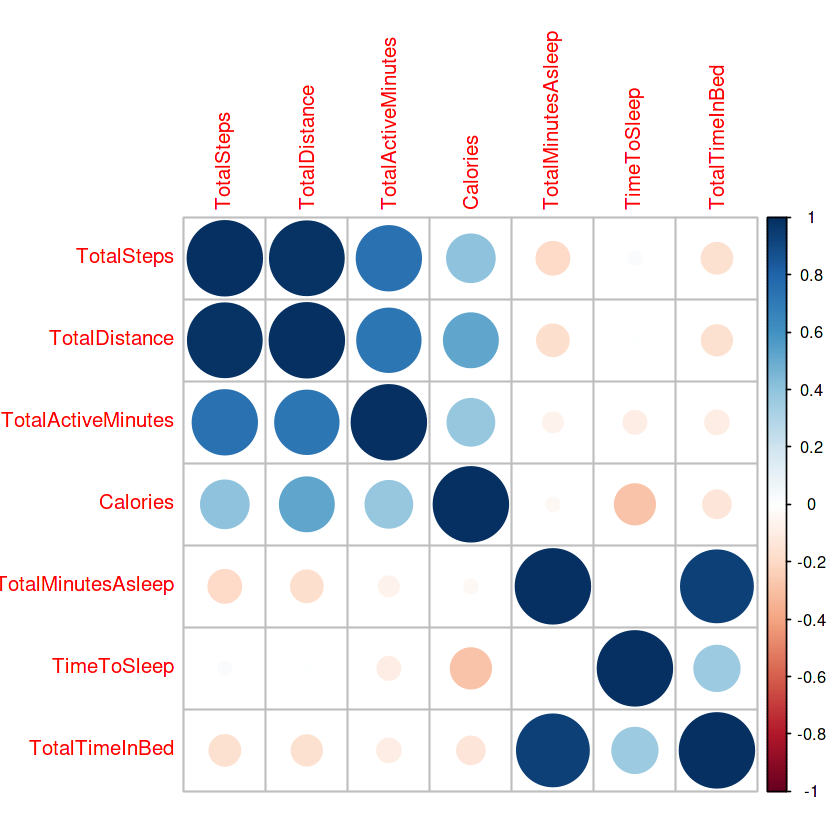

In [46]:
#Correlation Plot
correlation_data <- merged_df %>% select(TotalSteps,TotalDistance,TotalActiveMinutes,Calories,TotalMinutesAsleep,TimeToSleep,TotalTimeInBed)

#Correlation Plot
corrplot(cor(correlation_data))

### SHARE

**SUMMARY OF THE IMPORTANT FINDINGS FROM ABOVE ANALYSIS:**

* We can see that the Average of Total Steps Count is 7600(approx) which is little lower than the average daily steps count preferred by WHO i.e 8000 steps

*Recommendation: Bellabeat can notify its user through their mobile application regarding the remaining daily steps count to complete.
The maximum number of users fall into Inactive Category and Bellabeat can focus on these users.*

* There is a unique finding from the above analysis, the "TimeToSleep" (attribute which calculate the time difference between Total time in bed and total time asleep) helps to identify that average time interval is 39.31 minutes. 

*Recommendation: Belabeat can use this data to Monitor the sleep Pattern and can provide suggestion to its Users on "How to improve the sleep Quality?" etc.*

* We can see that there exist a positive correlation between the totalsteps~Calories.Its obvious thing that higher the number of TotalSteps, higher will be the calories burned. And this hypothesis is proved by above graph.

* We can clearly distinguish the difference between average Lightly Active Minutes and Fairly/Moderate/Very Active Minutes. The average Sedentary Minutes is also quite high i.e 16hrs(approx) which concludes that most of the users were Lightly Active or Inactive.

* From weekday Steps analysis of different type of users. We found that
    * The **VeryActive** Users were more active on Saturday & Sundays.
    * The **Active** Users were consistent with their step counts through out the week.


* There are less no. of "VeryActiveUsers" as compare to "Active" Users.Inactive Users tends to spend more of their time sleeping which is unhealthy.We can clearly identify the underlying trends in each category of users(Refer to Calories Vs. Sleep Quality By Steps Categories Graph).

* It seems an interesting trend that maximum users tends to take rest on Sundays followed by Wednesdays.Tuesdays,Thursdays & Fridays are quite busy days (Sleep Duration is less on these days)

*Recommendation: On busy Days where the sleep duration is below the recommended hours, the bellabeat app can notify users that the amount of Sleep is not sufficient enough and its an unhealthy routine*.


##### *NOTE- I HAVE ADDED A SHORT ANALYSIS WITH EACH AND EVERY GRAPH WHICH EXPLAINS THE UNDERLYING TRENDS AND HOW BELLABEAT CAN USE THIS TREND TO MAKE THEIR MARKETING STRATEGIES. PLEASE GO THROUGH THE ABOVE CODES AND MARKDOWNS AND PUT YOUR COMMENTS BELOW IF YOU HAVE ANY KINDS OF DOUBT RELATED TO ABOVE GRAPHS. THANKS IN ADVANCE!!* 

This was a Case Study for the Google Data Analytics Certificate.